# Imports

In [ ]:
import os
import pandas as pd
import random
import matplotlib.pyplot as plt
import numpy as np
import imageio
import math

# Sierpiński gasket

##   1. Create initial points of the triangle <br>
    For simplicy and best effect let's go with the equilateral triangle 

In [ ]:
def equilateral(sp: list, l: int) -> list:
    """
    Generate points of an equilateral triangle based on:
    sp: starting point
    l: desired side lenght
    """
    Ax = sp[0]
    Ay = sp[1]
    Bx = Ax + l
    By = Ay
    Cx = (Ax+Bx)/2
    Cy = math.sqrt(0.75*l**2) + Ay

    return([[Ax, Ay], [Bx, By], [Cx, Cy]])

In [ ]:
dt = equilateral([20,20],30)
df = pd.DataFrame(dt, columns = ['x', 'y'])
p = ['A', 'B', 'C']

fig, ax = plt.subplots(1)

ax.scatter(df.x, df.y, s=2, c = 'black', marker='o')
for i, x in enumerate(dt):
    ax.text(x[0]-1, x[1]-1, p[i])

ax.axis('off')

### Our starting points:

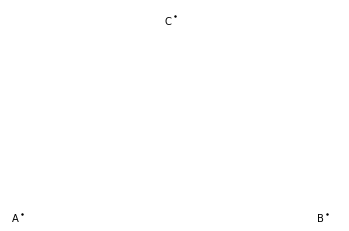

In [65]:
display(fig)

In [ ]:
df = pd.DataFrame(dt, columns = ['x', 'y'])
dt_add = dt

ddd

In [ ]:
# setting up generator to point us into the right direction (we don't want to
# end up going to the same point again)

# or do we....

def direction(points):
    previous_value = None
    while True:
        value = random.choice(points)
        if value != previous_value:
            yield value
            previous_value = value



d = direction([0,1,2])
for i in range(1):
    print(next(d))


In [ ]:
position = dt[0]
for i in range(1,100):
    x = random.randint(0,2)
    goingto = dt[x]

    x = (goingto[0]+position[0])/2
    y = (goingto[1]+position[1])/2

    new_point = [x,y]
    position = [x,y]

    dt_add.append(new_point)


df_add = pd.DataFrame(dt_add, columns = ['x', 'y'])


    

In [ ]:
plt.scatter(df_add.x, df_add.y, s=0.01, c = 'black')

In [ ]:
dt_add
gif_name = 'triangle'
print('building plots\n')
filenames = []

for i in range (1,10000,10):
    dt_temp = dt_add[0:i]
    df_temp = pd.DataFrame(dt_temp, columns = ['x', 'y'])
    plt.scatter(df_temp.x, df_temp.y, s=0.1, c = 'black', marker='o', edgecolors='none')
    # plt.xlim(0,50)
    # plt.ylim(0,50)

    filename = f'temp/frame_{i}.png'
    filenames.append(filename)

    plt.axis('off')
    plt.savefig(filename)
    plt.close()

# Build GIF
print('creating gif\n')
with imageio.get_writer(f'{gif_name}.gif', mode='I',fps=60) as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)
print('gif complete\n')
print('Removing Images\n')
# Remove files
for filename in set(filenames):
    os.remove(filename)
print('done')

In [ ]:
dt_temp = dt_add[0:10000]
df_temp = pd.DataFrame(dt_temp, columns = ['x', 'y'])
plt.scatter(df_temp.x, df_temp.y, s=0.1, c = 'black', marker='.')
plt.axis('off')
plt.show()